## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
np.random.seed(0)

In [5]:
X, y = make_blobs(n_samples= 5000, centers=[[4, 2], [8, 6], [-5, 3], [-10,5]])

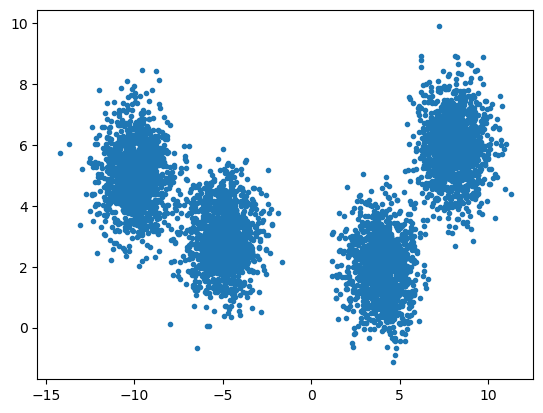

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker=".")

In [7]:
k_mean = KMeans(init= "k-means++", n_clusters = 4, n_init = 12)

In [8]:
k_mean.fit(X)

KMeans(n_clusters=4, n_init=12)

In [9]:
k_means_label = k_mean.labels_
k_means_label

array([0, 0, 1, ..., 1, 2, 1], dtype=int32)

In [11]:
k_means_cluster_centers = k_mean.cluster_centers_
k_means_cluster_centers

array([[ 8.07423583,  5.96397621],
       [-9.98960063,  5.01678762],
       [ 3.98048743,  1.98791845],
       [-4.99191443,  2.96889067]])

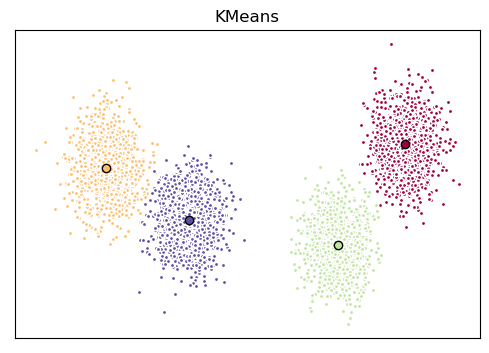

In [14]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_label))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_cluster_centers)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_label == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()